In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
%config InlineBackend.figure_format = 'svg'

In [5]:
#importing data from csv files
train_df = pd.read_csv(r'data/fashion-mnist_train.csv')
test_df = pd.read_csv(r'data/fashion-mnist_test.csv')

train_df.head() # checking if import is successful

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# converting data frames into numpy arrays
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype = 'float32' )

x_train = train_data[:,1:] / 255 # all rows 1: starts from column 1
y_train = train_data[:,0]

x_test = test_data[:,1:] / 255 # divide by 255 scales out pixel to 0 -1
y_test = test_data[:,0]

In [7]:
# test size is the percent you want to split train and test 0.2 is 20% for validation
# random_state: defines how to split data  can be left to null
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size = 0.2, random_state = 12345
)

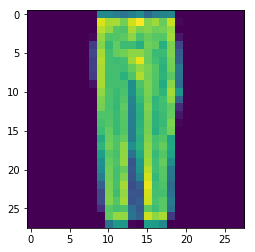

In [8]:
image = x_train[500,:].reshape(28,28)
plt.imshow(image)
plt.show()

Create the CNN
 - define the model
 - complie the model
 - fit the model

In [9]:
im_rows = 28
im_cols = 28
batch_size = 514
im_shape = (im_rows, im_cols, 1) # 1 is for adding 3D

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

In [20]:
'''
    define a model: 
        sequential model
    pass layer: 
        1. Conv2d(dim of output, matrix size of kernel, activation function, dim of input)
        2. MaxPooling2D(pool size) : downsize image for this example instead of 28 it is going to be 14
        3. Droupout: randomly dropout connections in next layer
        
        4. Flatten: flatten out all the layers
        5. Dense layer for input
        6. Dense layer for output
        
'''
name = '1_Layer'
cnn_model_1 = Sequential([
    Conv2D(filters = 32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size = 2, name="Maxpool"),
    Dropout(0.2, name ='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu',name='Dense'),
    Dense(10, activation='softmax',name='Output')
], name = name)

name = '2_Layer'
cnn_model_2 = Sequential([
    Conv2D(filters = 32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size = 2, name="Maxpool"),
    Dropout(0.2, name ='Dropout-1'),
    
    Conv2D(filters = 64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name ='Dropout-2'),
    
    Flatten(name='flatten'),
    Dense(32, activation='relu',name='Dense'),
    Dense(10, activation='softmax',name='Output')
], name = name)

name = '3_Layer'
cnn_model_3 = Sequential([
    Conv2D(filters = 32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size = 2, name="Maxpool"),
    Dropout(0.2, name ='Dropout-1'),
    
    Conv2D(filters = 64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name ='Dropout-2'),
    
    Conv2D(filters = 128, kernel_size=3, activation='relu', name='Conv2D-3'),
    Dropout(0.4, name ='Dropout-3'),
    
    Flatten(name='flatten'),
    Dense(32, activation='relu',name='Dense'),
    Dense(10, activation='softmax',name='Output')
], name = name)

cnn_models = [cnn_model_1, cnn_model_2, cnn_model_3]

In [21]:
# cnn_model_1.summary()
for model in cnn_models:
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
Maxpool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________
____

In [22]:
history_dic = {}

for model in cnn_models:
    model.compile(
        loss = 'sparse_categorical_crossentropy',
        optimizer = Adam(),
        metrics = ['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size = batch_size,
        epochs = 50, verbose =1,
        validation_data = (x_validate, y_validate)
    )
    
    history_dict[model.name] = history

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 26s 533us/step - loss: 0.7869 - acc: 0.7436 - val_loss: 0.4731 - val_acc: 0.8332
Epoch 2/50
48000/48000 [==============================] - 23s 487us/step - loss: 0.4327 - acc: 0.8493 - val_loss: 0.3895 - val_acc: 0.8688
Epoch 3/50
48000/48000 [==============================] - 23s 489us/step - loss: 0.3790 - acc: 0.8667 - val_loss: 0.3511 - val_acc: 0.8817
Epoch 4/50
48000/48000 [==============================] - 23s 488us/step - loss: 0.3481 - acc: 0.8773 - val_loss: 0.3358 - val_acc: 0.8828
Epoch 5/50
48000/48000 [==============================] - 24s 494us/step - loss: 0.3289 - acc: 0.8831 - val_loss: 0.3177 - val_acc: 0.8908
Epoch 6/50
48000/48000 [==============================] - 23s 483us/step - loss: 0.3147 - acc: 0.8893 - val_loss: 0.3138 - val_acc: 0.8898
Epoch 7/50
48000/48000 [==============================] - 24s 497us/step - loss: 0.3063 - acc: 0.8922 - val_loss: 0.

NameError: name 'history_dict' is not defined

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize =(8,6))

for history in history_dic:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label = history)
    ax1.plot(val_loss, label = history)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()